# Spouses, baggage

We found, in the Titanic dataset, that Third Class passengers were less likely to survive the disaster.

Why?

Was it because they were locked behind gates while the higher-class passengers were being boarded onto lifeboats?  Or some other reason?

In [1]:
# Run this cell to start.
import numpy as np
import pandas as pd
# Safe settings for Pandas.
pd.set_option('mode.chained_assignment', 'raise')

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

The official report into the disaster was the [British Wreck Commissioner's
Inquiry report](https://www.titanicinquiry.org/BOTInq/BOTReport/botRep01.php)
by [Lord
Mersey](https://en.wikipedia.org/wiki/John_Bigham,_1st_Viscount_Mersey).

There is a short section of the report entitled [Third Class
Passengers](https://www.titanicinquiry.org/BOTInq/BOTReport/botRep3rdClass.php).
It includes:

> It had been suggested before the Enquiry that the third class passengers had
> been unfairly treated; that their access to the Boat deck had been impeded,
> and that when at last they reached that deck the first and second class
> passengers were given precedence in getting places in the boats. There
> appears to have been no truth in these suggestions. It is no doubt true that
> the proportion of third class passengers saved falls far short of the
> proportion of the first and second class, but this is accounted for by the
> greater reluctance of the third class passengers to leave the ship, by their
> unwillingness to part with their baggage, by the difficulty in getting them
> up from their quarters, which were at the extreme ends of the ship, and by
> other similar causes.

Your job in this notebook it is to explore the evidence in the data for the
"greater reluctance of the third class passengers to leave the ship".

For example, we see [figures in Lord Mersey's
report](https://www.titanicinquiry.org/BOTInq/BOTReport/botRepSaved.php), using
slightly different data from the data you have here, that show:

* 16% of adult male Third Class passengers survived, compared to 8% of Second
  Class males, and 33% of First Class males;
* The corresponding figures for women are 46% (Third) 86% (Second) 97% (First).

Why were Third Class women about half as likely to be saved as Second Class
women, when Third Class men were, if anything, more likely to be saved than
Second Class men?

One possible explanation is that Third Class passengers were more likely to be
young couples, maybe with children.   It may well have been true the young
wives, maybe with children, would be more reluctant to leave their husbands
behind on the ship.  See [Rhoda Abbott's
story](https://en.wikipedia.org/wiki/Rhoda_Abbott) for an example.

One way of getting at this effect could be to use the `sibsp` and `parch`
columns of the dataset:

In [2]:
# Read the dataset as a data frame.
titanic = pd.read_csv("titanic_stlearn.csv")
# Boolean with True for passengers with not-NA sibsp values, False otherwise.
have_sibsp = titanic['sibsp'].notna()
# Select rows with value (not-NA) sibsp values.
with_sibsp = titanic[have_sibsp]
with_sibsp.head()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,Norway,348125.0,7.13,0.0,0.0,yes


In [3]:
with_sibsp

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,5547.0,7.1100,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,2673.0,20.0500,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,2673.0,20.0500,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,England,2673.0,20.0500,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,Norway,348125.0,7.1300,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,Southampton,France,248747.0,13.0000,0.0,0.0,no
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,Cherbourg,Turkey,2656.0,7.0406,0.0,0.0,no
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,Cherbourg,Turkey,2670.0,7.0406,0.0,0.0,no
1317,"Zenni, Mr. Philip",male,25.0,3rd,Cherbourg,Lebanon,2620.0,7.0406,0.0,0.0,yes


Here we have dropped all cases where the `sibsp` value is missing, but you might want to:

1. Investigate why the `sibsp` values might be missing, and
2. Consider restoring some of the passengers where the value is missing, or
   removing more passengers that do not correspond to your questions.

You will find more information about the `sibsp` and `parch` variables in the
[Vanderbilt site info
file](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt).
Quoting from that file:

> sibsp           Number of Siblings/Spouses Aboard
>
> parch           Number of Parents/Children Aboard
>
> ...
>
> With respect to the family relation variables (i.e. sibsp and parch) some
> relations were ignored.  The following are the definitions used for sibsp and
> parch.
>
> Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard
>           Titanic
>
> Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and
>           Fiancées Ignored)
>
> Parent:   Mother or Father of Passenger Aboard Titanic
>
> Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
>
> Other family relatives excluded from this study include cousins,
> nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with
> a nanny, therefore parch=0 for them.  As well, some travelled with very close
> friends or neighbors in a village, however, the definitions do not support
> such relations.

Of course, you also have the passengers' names to go on, including the names of
the children, and any research you do into the passengers and their families.

Use the variables in the data file, and any other methods you can come up with,
to test the following ideas:

1. One explanation for passengers being lost or saved was reluctance to leave a
   spouse, children or other family behind and
2. This goes some way to explaining the relatively low proportion of Third
   Class female passengers that were saved.

Give your assessment of both of these ideas, along with the analyses that
support your conclusions.


## Marking scheme

* Depth of analysis: 25% of marks.
* Analysis appropriate to questions: 25% of marks.
* Quality, clarity and organization of analysis code: 25% of marks.
* Answers based in analysis: 25% of marks.


In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy import stats
import pandas as pd
import re

from matplotlib import rcParams
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer

In [5]:
with_sibsp = with_sibsp.reset_index().drop(columns=['index'])

In [6]:
base_features = ['name', 'gender', 'age', 'class', 'embarked', 'country', 'ticketno',
       'fare', 'sibsp', 'parch']

In [7]:
with_sibsp.loc[:,'FamilySize'] = with_sibsp.loc[:, 'sibsp'] + with_sibsp.loc[:, 'parch'] + 1

with_sibsp['IsAlone'] = 0
with_sibsp.loc[with_sibsp['FamilySize'] == 1, 'IsAlone'] = 1


def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

with_sibsp['Title'] = with_sibsp['name'].apply(get_title)

with_sibsp['Title'] = with_sibsp['Title'].replace(
       ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
       'Rare')

with_sibsp['Title'] = with_sibsp['Title'].replace('Mlle', 'Miss')
with_sibsp['Title'] = with_sibsp['Title'].replace('Ms', 'Miss')
with_sibsp['Title'] = with_sibsp['Title'].replace('Mme', 'Mrs')

with_sibsp['Has_Age'] = with_sibsp['age'].isnull().astype(int)

imputer = KNNImputer(n_neighbors=2, weights="uniform")
with_sibsp[['Age_knn']] = imputer.fit_transform(with_sibsp[['age']])

robuster = RobustScaler()
with_sibsp['Age_knn'] = robuster.fit_transform(with_sibsp[['Age_knn']])

# with_sibsp.drop(['Age'],axis=1,inplace=True)

transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
with_sibsp['fare'] = transformer.fit_transform(with_sibsp[['fare']])

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
with_sibsp[['fare']] = imp.fit_transform(with_sibsp[['fare']])

with_sibsp['Fare_class'] = pd.qcut(with_sibsp['fare'], 5, labels=['F1', 'F2', 'F3','F4','F5' ])

with_sibsp['Fare_class'] = with_sibsp['Fare_class'].replace({'F1':1,'F2':2,'F3':3,'F4':4,'F5':5})

with_sibsp['survived'] = with_sibsp['survived'].replace('no', '0')
with_sibsp['survived'] = with_sibsp['survived'].replace('yes', '1')


imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
with_sibsp = pd.get_dummies(with_sibsp, columns = ['Title','gender', 'embarked', 'class'],drop_first=True)


In [8]:
with_sibsp.dropna(axis=0, how = 'any', inplace=True)

In [9]:
with_sibsp

,name,age,country,ticketno,fare,sibsp,parch,survived,FamilySize,IsAlone,...,Title_Rare,Title_Revd,Title_Sr,Title_Sra,gender_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton,class_2nd,class_3rd
0,"Abbing, Mr. Anthony",42.0,United States,5547.0,-1.350702,0.0,0.0,0,1.0,1,...,0,0,0,0,1,0,0,1,0,1
1,"Abbott, Mr. Eugene Joseph",13.0,United States,2673.0,0.189810,0.0,2.0,0,3.0,0,...,0,0,0,0,1,0,0,1,0,1
2,"Abbott, Mr. Rossmore Edward",16.0,United States,2673.0,0.189810,1.0,1.0,0,3.0,0,...,0,0,0,0,1,0,0,1,0,1
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",39.0,England,2673.0,0.189810,1.0,1.0,1,3.0,0,...,0,0,0,0,0,0,0,1,0,1
4,"Abelseth, Miss. Karen Marie",16.0,Norway,348125.0,-1.311770,0.0,0.0,1,1.0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,"Yvois, Miss. Henriette",24.0,France,248747.0,-0.139710,0.0,0.0,0,1.0,1,...,0,0,0,0,0,0,0,1,1,0
1303,"Zakarian, Mr. Mapriededer",22.0,Turkey,2656.0,-1.746017,0.0,0.0,0,1.0,1,...,0,0,0,0,1,1,0,0,0,1
1304,"Zakarian, Mr. Ortin",27.0,Turkey,2670.0,-1.746017,0.0,0.0,0,1.0,1,...,0,0,0,0,1,1,0,0,0,1
1305,"Zenni, Mr. Philip",25.0,Lebanon,2620.0,-1.746017,0.0,0.0,1,1.0,1,...,0,0,0,0,1,1,0,0,0,1


In [11]:

features = with_sibsp.columns.drop(['name','survived','country'])


In [28]:
X = with_sibsp[features]
y = with_sibsp['survived']

In [29]:
with_sibsp[features].isnull().sum().T

age                     0
ticketno                0
fare                    0
sibsp                   0
parch                   0
FamilySize              0
IsAlone                 0
Has_Age                 0
Age_knn                 0
Fare_class              0
Title_Captain           0
Title_Colonel           0
Title_Fr                0
Title_Master            0
Title_Miss              0
Title_Mr                0
Title_Mrs               0
Title_Rare              0
Title_Revd              0
Title_Sr                0
Title_Sra               0
gender_male             0
embarked_Cherbourg      0
embarked_Queenstown     0
embarked_Southampton    0
class_2nd               0
class_3rd               0
dtype: int64

In [30]:


# Import Model
from sklearn.ensemble import RandomForestClassifier

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

# Fit the model
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
    'max_features':[5, 10, 15]
}

# build model
rf = RandomForestClassifier()
# Run grid Search
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5) # cv=5 represents 5 fold cross validation
# find best params
gs.fit(X, y)
print("best params:", gs.best_params_)


best params: {'max_features': 5, 'n_estimators': 10}


In [31]:
scores

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [32]:
rf = RandomForestClassifier(n_estimators=10, max_features=5)
rf.fit(X,y)
ft_imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
ft_imp.head(10)

ticketno       0.172193
gender_male    0.148214
fare           0.123693
Age_knn        0.113712
age            0.094615
Title_Mrs      0.049070
class_3rd      0.047366
Title_Mr       0.047274
Title_Miss     0.035438
Fare_class     0.032927
dtype: float64

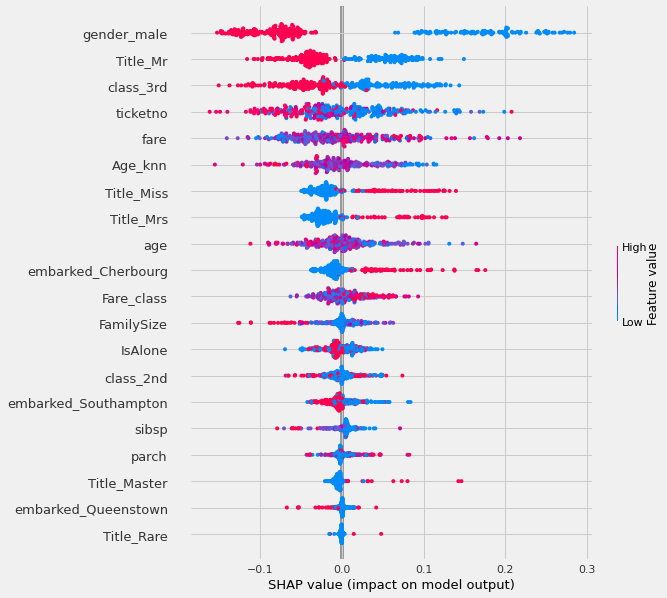

In [33]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

ValueError: x and y must have same first dimension, but have shapes (1,) and (15,)

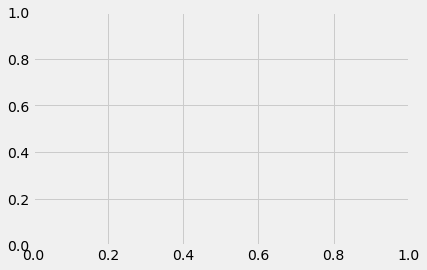

In [19]:
scores = gs.cv_results_['mean_test_score']

# plot
import matplotlib.pyplot as plt

scores = gs.cv_results_['mean_test_score']
plt.plot(10, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

In [ ]:



first_row = X_test[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

# Use score method to calculate the accuracy over the whole test set
rf.score(X_test, y_test)

## Your analysis

Fill out the notebook with your analysis and answers from here.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4baa562c-a0d9-4609-b164-a535ee9fd45a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>